<a href="https://colab.research.google.com/github/gerardopdm/ml-ejemplos/blob/master/Casas_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import seaborn as sns

import folium

In [0]:
data1 = pd.read_csv("sample_data/california_housing_train.csv")

In [3]:
data1.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [4]:
data1[["housing_median_age","total_rooms","median_income","median_house_value"]].corr()

,housing_median_age,total_rooms,median_income,median_house_value
housing_median_age,1.000000,-0.360984,-0.115932,0.106758
total_rooms,-0.360984,1.000000,0.195383,0.130991
median_income,-0.115932,0.195383,1.000000,0.691871
median_house_value,0.106758,0.130991,0.691871,1.000000


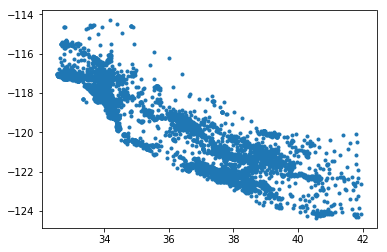

In [5]:
plt.scatter(x=data1[["latitude"]],y=data1[["longitude"]],marker=".")

In [0]:
data_X=data1.iloc[:,:8]

In [0]:
data_y=data1.iloc[:,8:9]

In [0]:
def convert_to_rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)    
    halfmax = (minimum + maximum) / 2
    if minimum <= value <= halfmax:
        r = 0
        g = int( 255./(halfmax - minimum) * (value - minimum))
        b = int( 255. + -255./(halfmax - minimum)  * (value - minimum))
        return (r,g,b)    
    elif halfmax < value <= maximum:
        r = int( 255./(maximum - halfmax) * (value - halfmax))
        g = int( 255. + -255./(maximum - halfmax)  * (value - halfmax))
        b = 0
        return (r,g,b)

In [9]:
valor_maximo=data1.median_house_value.max()
print(valor_maximo)
valor_minimo=data1.median_house_value.min()
print(valor_minimo)


500001.0
14999.0


In [10]:
convert_to_rgb(valor_minimo, valor_maximo, 160000)

(0, 152, 102)

In [11]:
'#%02x%02x%02x' % convert_to_rgb(valor_minimo, valor_maximo, 160000)

'#009866'

In [17]:
 m = folium.Map(location=[36.778259, -119.417931],zoom_start=7)
for i in range(int(len(data1)/6)):
  i_random=int(np.random.random()*len(data1))
  folium.CircleMarker(
    [data1.iloc[i_random]["latitude"], data1.iloc[i_random]["longitude"]],
    radius=2,
#    radius=data1.iloc[i_random]["median_house_value"]/100000,
#    popup = ('City: ' + str(city).capitalize() + '<br>'
#             'Bike score: ' + str(bike) + '<br>'
#             'Traffic level: ' + str(traffic) +'%'
#            ),
    color='b',
#    key_on = traffic_q,
    threshold_scale=[0,1,2,3],
    fill_color='#%02x%02x%02x' % convert_to_rgb(valor_minimo, valor_maximo, data1.iloc[i_random]["median_house_value"]),
    fill=True,
    fill_opacity=1
    ).add_to(m)
m

In [0]:
mrk=np.random.rand(len(data_X)) < 0.8

In [0]:
data_X_train=data_X[mrk]
data_y_train=data_y[mrk]

data_X_test=data_X[~mrk]
data_y_test=data_y[~mrk]


In [32]:
data_y_train.shape

(13617, 1)

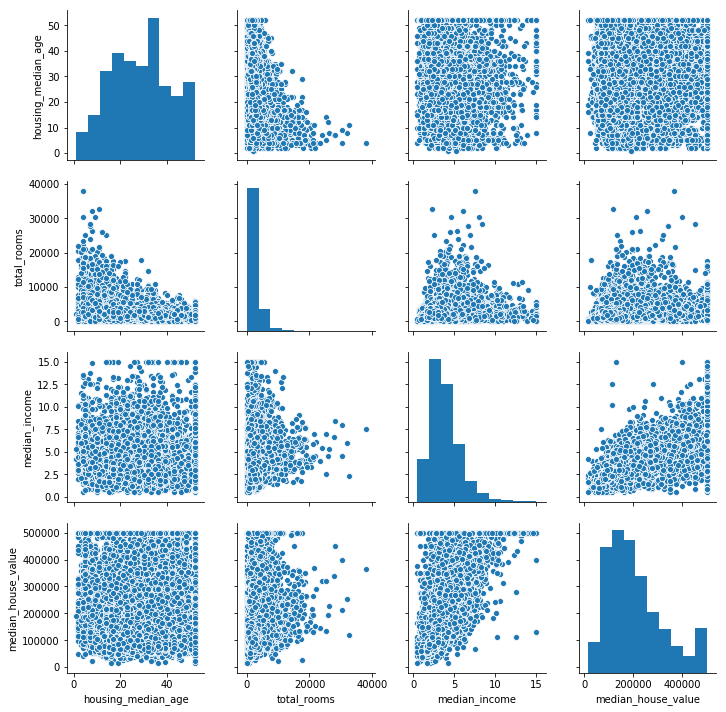

In [60]:
sns.pairplot(data1[["housing_median_age","total_rooms","median_income","median_house_value"]])

In [1]:
!pip install folium

In [0]:
import folium
m = folium.Map(location=[45.5236, -122.6750])

In [3]:
m